<a href="https://colab.research.google.com/github/lserafin/ColabRepo/blob/master/PortfolioOptimizationCrypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://randerson112358.medium.com/python-for-finance-portfolio-optimization-66882498847

In [1]:
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Create The Fictional Portfolio

In [95]:
# Assets
assets =  ["BTC-USD", "ETH-USD", "XRP-USD", "LTC-USD", "BCH-USD"]

In [96]:
# Assign weights to the stocks. Weights must = 1 so 0.2 for each
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [97]:
#Get the stock starting date
stockStartDate = '2020-01-01'
# Get the stocks ending date aka todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')

In [98]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()
#Store the adjusted close price of stock into the data frame
for stock in assets:
   df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=today)['Adj Close']

In [99]:
df

,BTC-USD,ETH-USD,XRP-USD,LTC-USD,BCH-USD
Date,,,,,
2020-01-01,7200.174316,130.802002,0.192667,42.017719,204.397537
2020-01-02,6985.470215,127.410179,0.188043,39.823017,195.698563
2020-01-03,7344.884277,134.171707,0.193521,42.415573,222.412979
2020-01-04,7410.656738,135.069366,0.194355,43.326607,226.018692
2020-01-05,7411.317383,136.276779,0.195537,43.553207,224.096527
...,...,...,...,...,...
2020-11-30,19625.835938,614.842529,0.664337,87.574631,316.420197
2020-12-01,18802.998047,587.324158,0.612923,85.435768,288.135834
2020-12-02,19201.091797,598.352356,0.629893,88.856514,294.251068


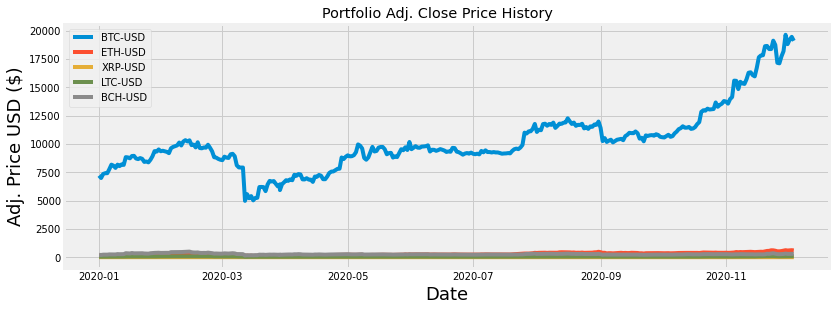

In [100]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [101]:
#Show the daily simple returns, NOTE: Formula = new_price/old_price - 1
returns = df.pct_change()
returns

,BTC-USD,ETH-USD,XRP-USD,LTC-USD,BCH-USD
Date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-01-02,-0.029819,-0.025931,-0.024004,-0.052233,-0.042559
2020-01-03,0.051452,0.053069,0.029134,0.065102,0.136508
2020-01-04,0.008955,0.006690,0.004311,0.021479,0.016212
2020-01-05,0.000089,0.008939,0.006081,0.005230,-0.008504
...,...,...,...,...,...
2020-11-30,0.079678,0.067884,0.095821,0.105251,0.114424
2020-12-01,-0.041926,-0.044757,-0.077391,-0.024423,-0.089389
2020-12-02,0.021172,0.018777,0.027686,0.040039,0.021223


In [102]:
# co-variance matrix (https://en.wikipedia.org/wiki/Covariance_matrix)
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,BTC-USD,ETH-USD,XRP-USD,LTC-USD,BCH-USD
BTC-USD,0.366388,0.408331,0.323770,0.400472,0.432289
ETH-USD,0.408331,0.632425,0.491687,0.538924,0.579223
XRP-USD,0.323770,0.491687,0.672097,0.470128,0.551531
LTC-USD,0.400472,0.538924,0.470128,0.614955,0.592796
BCH-USD,0.432289,0.579223,0.551531,0.592796,0.759103


In [103]:
# Expected portfolio variance= WT * (Covariance Matrix) * W
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.5049307467439414

In [104]:
# Expected portfolio volatility= SQRT (WT * (Covariance Matrix) * W)
port_volatility = np.sqrt(port_variance)
port_volatility

0.7105847920860264

In [105]:
# Calculate the portfolio annual simple return.
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

1.0170162988925684

In [106]:
# Show the expected annual return, volatility or risk, and variance.
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 102.0%
Annual volatility/standard deviation/risk : 71.0%
Annual variance : 50.0%


In [107]:
# This are the numbers for each 20 % 

# Optimize The Portfolio

In [108]:
pip install PyPortfolioOpt

In [109]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [110]:
# Calculate the expected returns and the annualised sample covariance matrix of daily asset returns.
mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

In [111]:
# Optimize for maximal Sharpe ration
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('BTC-USD', 0.0), ('ETH-USD', 1.0), ('XRP-USD', 0.0), ('LTC-USD', 0.0), ('BCH-USD', 0.0)])
Expected annual return: 209.0%
Annual volatility: 79.5%
Sharpe Ratio: 2.60


(2.0902075432317226, 0.7952512948099849, 2.6032117856864)